## Simple Linear Regression

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,60,145
3,46,143
4,80,182


Text(0, 0.5, 'Height')

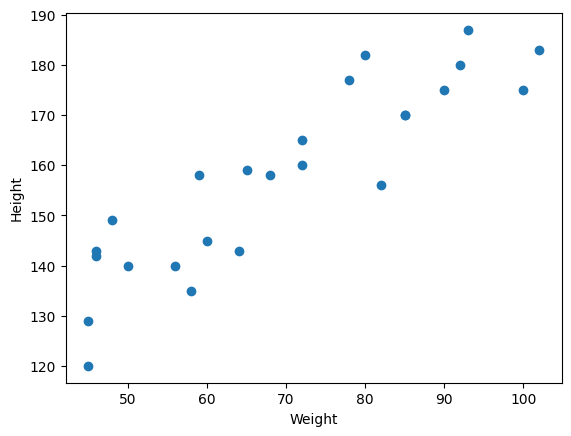

In [84]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [85]:
## Divide the dataset into independent and dependent features
X=df[['Weight']]  # independent feature
y=df['Height']  # dependent feature

In [86]:
## train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [87]:
X.shape

(25, 1)

In [88]:
X_train.shape,X_test.shape

((20, 1), (5, 1))

In [89]:
## Standardize the dataset-Train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [90]:

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## fit-calculate mean and standard deviation for the train data
## transform-it will try to chage the data by applying Z-score
## we just use transform for test data because the mean and std calculated for train data need to be applied here
## When we use transform for the test data the Z-score that will applied take the same mean and std of train data

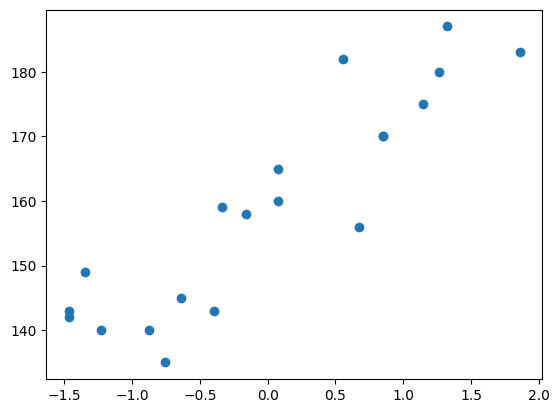

In [91]:
plt.scatter(X_train,y_train)

In [92]:
## Train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [93]:
regressor=LinearRegression()

In [94]:
regressor.fit(X_train,y_train)

LinearRegression()

In [95]:
print("The Coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The Coefficient of weight is  [14.59398816]
Intercept: 159.1


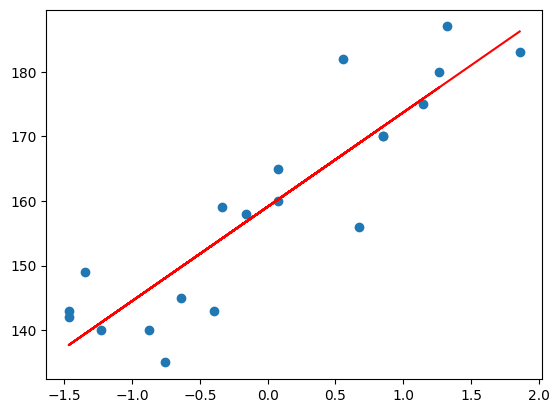

In [96]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data <br>
1.predicted height output=intercept_ + coef_(Weights)<br>
2.y_pred_train=159.1 + 14.59(X_train)<br>

### prediction of test data <br>
1.predicted height output=intercept_ + coef_(Weights)<br>
2.y_pred_test=159.1 + 14.59(X_test)<br>

In [97]:
y_pred_test=regressor.predict(X_test)

In [98]:
y_pred_test,y_test

(array([184.49553808, 136.82473281, 136.82473281, 148.95911961,
        165.42721597]),
 8     175
 16    129
 0     120
 23    158
 11    177
 Name: Height, dtype: int64)

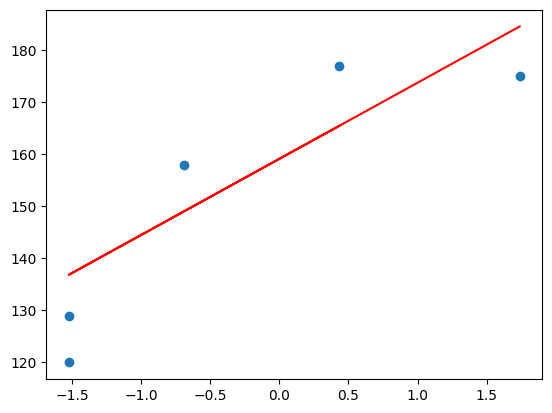

In [99]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

### MSE,MAE,RMSE
### R square and adjusted R square

In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [101]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

130.0260339314254
10.951733624916226
11.402895857255972


### R square
Formula

**R^2 = 1 - SSR/SST**

R^2= coefficient of determination
SSR= sum of squares of residuals
SST= total sum of squares

In [102]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [103]:
score

0.7629684374882868

### Adjusted R Square
Formula

**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

R2= The R2 of the model
n=The number of observation
k=The number of predictor variables


In [104]:
## Display adjusted R-squared
adjusted_r2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r2)

0.683957916651049


In [105]:
regressor

LinearRegression()

In [109]:
## new data point weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.55233016]])

In [110]:
scaled_weight[0]

array([0.55233016])

In [113]:
print("The height prediction for weight 80 kg is:",regressor.predict([scaled_weight[0]]))


The height prediction for weight 80 kg is: [167.1606998]


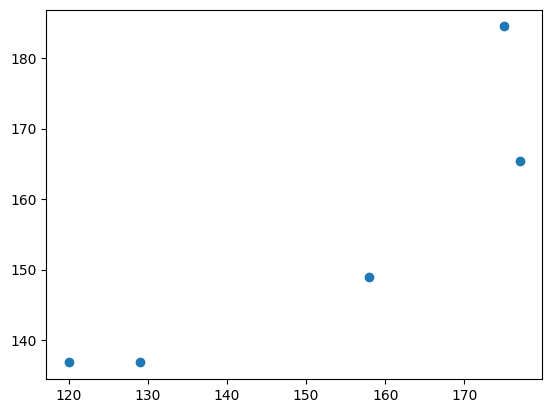

In [114]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [115]:
## Residuals
residuals=y_test-y_pred_test
residuals

8     -9.495538
16    -7.824733
0    -16.824733
23     9.040880
11    11.572784
Name: Height, dtype: float64

C:\Users\enter\AppData\Local\Temp\ipykernel_3648\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

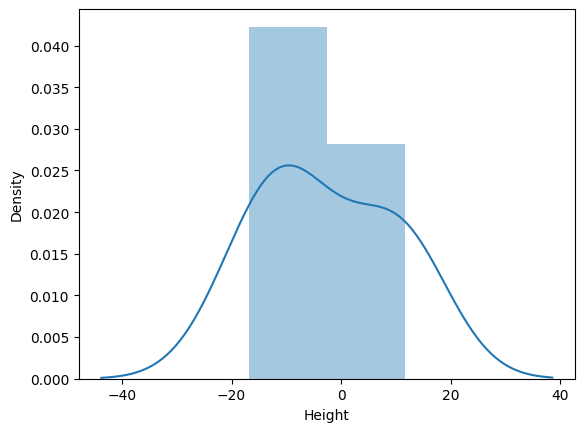

In [122]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

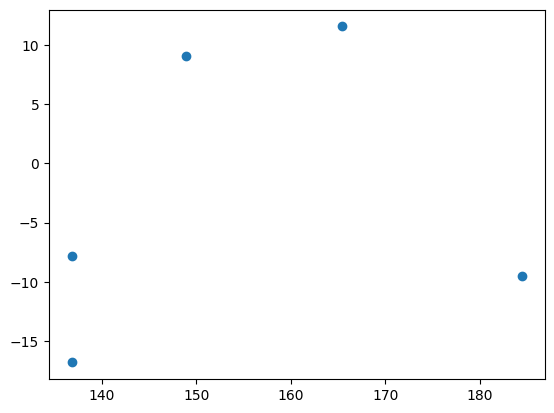

In [118]:
## scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)